In [1]:
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import pandas as pd
import cv2
import os

# Loading in the data

In [2]:
# Important information
image_sizes = (256,256)
base_path = "C:\\School\\EECS 605\\Project\\Epic Dataset!\\"
image_paths = [base_path + "Ones\\Right\\", base_path + "Ones\\Left\\", 
               base_path + "Twos\\Right\\", base_path + "Twos\\Left\\", 
               base_path + "Threes\\Right\\", base_path + "Threes\\Left\\", 
               base_path + "Fours\\Right\\", base_path + "Fours\\Left\\", 
               base_path + "Fives\\Right\\", base_path + "Fives\\Left\\",]
num_images = []
for i in range(int(len(image_paths))):
    num_images.append(len(os.listdir(image_paths[i][:-1])))

In [3]:
print(f"The total number of train/valid images is {sum(num_images)}")

The total number of train/valid images is 3065


In [4]:
# Reading in data and creating dataset
X = np.zeros((sum(num_images), image_sizes[0], image_sizes[1]))
Y = np.zeros(sum(num_images))
summed = 0
for i in range(int(len(image_paths))):
    for j in range(num_images[i]):
        X[summed + j, : :] = np.asarray(Image.open(image_paths[i] + f"image{j}.jpg")) / 255
        Y[summed + j] = i // 2
    summed += num_images[i]
X_train, X_valid, y_train, y_valid = train_test_split(np.expand_dims(X, axis = 3), 
                                                      Y, test_size=0.2, random_state=42)        

# Training the model

In [106]:
# Deep Learning Model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))

In [107]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 254, 254, 16)      160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 125, 16)      2320      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)       

In [108]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                              patience=10, 
                                              restore_best_weights=True)
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64, 
                    validation_data=(X_valid, y_valid), 
                    callbacks = [early_stop])

Train on 2452 samples, validate on 613 samples
Epoch 1/100
2452/2452 [==============================] - 36s 14ms/sample - loss: 1.4684 - accuracy: 0.3434 - val_loss: 0.9350 - val_accuracy: 0.6786
Epoch 2/100
2452/2452 [==============================] - 35s 14ms/sample - loss: 0.8185 - accuracy: 0.6794 - val_loss: 0.5925 - val_accuracy: 0.8042
Epoch 3/100
2452/2452 [==============================] - 36s 15ms/sample - loss: 0.5474 - accuracy: 0.8002 - val_loss: 0.4279 - val_accuracy: 0.8499
Epoch 4/100
2452/2452 [==============================] - 35s 14ms/sample - loss: 0.3630 - accuracy: 0.8670 - val_loss: 0.3071 - val_accuracy: 0.8940
Epoch 5/100
2452/2452 [==============================] - 36s 15ms/sample - loss: 0.2499 - accuracy: 0.9066 - val_loss: 0.2982 - val_accuracy: 0.8972
Epoch 6/100
2452/2452 [==============================] - 35s 14ms/sample - loss: 0.1502 - accuracy: 0.9462 - val_loss: 0.2604 - val_accuracy: 0.9184
Epoch 7/100
2452/2452 [==============================] - 37

# Analyzing the model

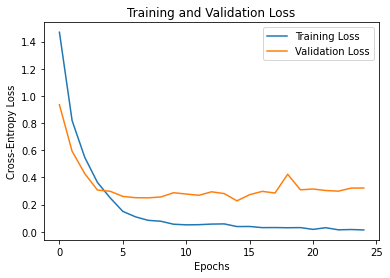

In [109]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training and Validation Loss')
plt.savefig('Training Loss Plot.png')

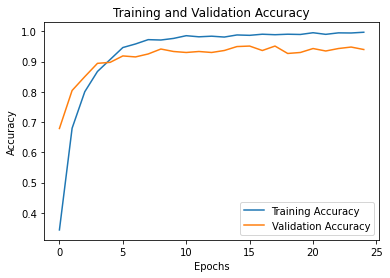

In [110]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('Training Accuracy Plot.png')

# Analyzing on Test Data

In [111]:
# Creating the test dataset
image_paths = [base_path + "zTest_Data\\Ones\\Right\\", base_path + "zTest_Data\\Ones\\Left\\", 
               base_path + "zTest_Data\\Twos\\Right\\", base_path + "zTest_Data\\Twos\\Left\\", 
               base_path + "zTest_Data\\Threes\\Right\\", base_path + "zTest_Data\\Threes\\Left\\", 
               base_path + "zTest_Data\\Fours\\Right\\", base_path + "zTest_Data\\Fours\\Left\\", 
               base_path + "zTest_Data\\Fives\\Right\\", base_path + "zTest_Data\\Fives\\Left\\",]
num_images = []
for i in range(int(len(image_paths))):
    num_images.append(len(os.listdir(image_paths[i][:-1])))
    
X_test = np.zeros((sum(num_images), image_sizes[0], image_sizes[1]))
y_test = np.zeros(sum(num_images))
summed = 0
for i in range(int(len(image_paths))):
    for j in range(num_images[i]):
        X_test[summed + j, : :] = np.asarray(Image.open(image_paths[i] + f"image{j}.jpg")) / 255
        y_test[summed + j] = i // 2
    summed += num_images[i]

In [112]:
predictions = model.predict(np.expand_dims(X_test, axis=3))
y_pred = np.argmax(predictions, axis=1)

In [113]:
print(f"The test accuracy was {sum(y_pred == y_test) / y_test.shape[0]}")

The test accuracy was 0.9161111111111111


In [114]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns = ["Predicted 1 Finger", "Predicted 2 Fingers", "Predicted 3 Fingers", 
                        "Predicted 4 Fingers", "Predicted 5 Fingers"],
             index = ["Actually 1 Finger", "Actually 2 Fingers", "Actually 3 Fingers", 
                        "Actually 4 Fingers", "Actually 5 Fingers"])

,Predicted 1 Finger,Predicted 2 Fingers,Predicted 3 Fingers,Predicted 4 Fingers,Predicted 5 Fingers
Actually 1 Finger,350,10,0,0,0
Actually 2 Fingers,7,349,4,0,0
Actually 3 Fingers,4,18,331,7,0
Actually 4 Fingers,5,3,33,298,21
Actually 5 Fingers,6,0,1,32,321


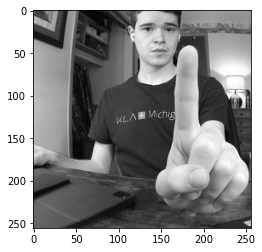

In [200]:
# Saving Examples of Missclassified Images
image_path = "C:\\School\\EECS 605\\Project\\Data\\zMissclassified_Examples\\"
missclassified = np.where(y_pred != y_test)[0]
for i in range(12):
    missclassified_image = np.random.choice(missclassified)
    plt.imshow(X_test[missclassified_image,:,:], cmap='gray')
    plt.savefig(f"{image_path}" + 
                f"Missclassified {i}. Predicted {y_pred[missclassified_image]+1}.jpg")

# Saving the model as an ONNX model

In [115]:
import keras2onnx
onnx_model = keras2onnx.convert_keras(model)
keras2onnx.save_model(onnx_model, "my_model.onnx")

tf executing eager_mode: True
tf.keras model eager_mode: False
The ONNX operator number change on the optimization: 44 -> 21


# Testing that the ONNX model works

In [116]:
import onnxruntime
sess = onnxruntime.InferenceSession("my_model.onnx")

In [117]:
def makeInferences(sess, input_img):
    input_name = sess.get_inputs()[0].name
    output_name = sess.get_outputs()[0].name
    pred_onx = sess.run([output_name], {input_name: input_img})[0]
    return pred_onx

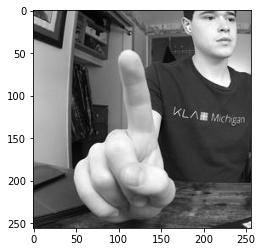

In [118]:
image_test_num = 17
input_img = np.reshape(X_test[image_test_num,:,:], (1,256,256,1))
input_img = input_img.astype(np.float32)
plt.imshow(np.reshape(input_img, (256,256)), cmap='gray')

In [119]:
scores = makeInferences(sess, input_img)
print(f"The predicted number of fingers was {np.argmax(scores) + 1}")

The predicted number of fingers was 1


# Testing on my test image

In [120]:
def preprocess(image):
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    midx, midy = int(grayImage.shape[1]/2), int(grayImage.shape[0]/2)
    crop_img = grayImage[:, midx-midy:midx+midy]
    
    img = Image.fromarray(crop_img)
    img = img.resize((256, 256), Image.ANTIALIAS)
    
    return img

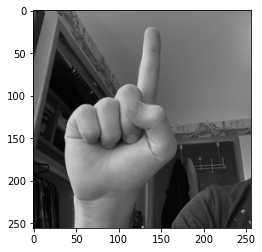

In [54]:
image_path = base_path + "zPhone_Test_Data\\"
image_name = "IMG-0317.jpg"
image_path = image_path + image_name

img = np.asarray(Image.open(image_path), dtype=np.float32)
img = preprocess(img)

plt.imshow(img)

In [55]:
img = np.asarray(img, dtype=np.float32) / 255
img = np.reshape(img, (1,256,256,1))
scores = makeInferences(sess, img)
scores

array([[9.9968028e-01, 3.0909886e-04, 6.6636666e-08, 6.1085380e-11,
        1.0428954e-05]], dtype=float32)

In [56]:
np.argmax(scores) + 1

1